In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Facility Air Pollution Dataset - All Facilities.csv', low_memory = False)
df = df.loc[df['State']=='WI']

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 25007 to 25937
Data columns (total 43 columns):
Unique ID                                 931 non-null object
FacilityName                              931 non-null object
Rank_TRI_14                               589 non-null float64
Rank_GHG_14                               141 non-null float64
Latitude                                  931 non-null float64
Longitude                                 931 non-null float64
LocationAddress                           930 non-null object
City                                      931 non-null object
State                                     931 non-null object
ZIP                                       931 non-null object
County                                    931 non-null object
FIPScode                                  931 non-null float64
PrimaryNAICS                              931 non-null int64
SecondPrimaryNAICS                        12 non-null float64
ThirdPrimaryNAICS

In [8]:
df_clean = df.loc[df['Rank_TRI_14'].notnull()].sort_values(by = 'Rank_TRI_14')
df_clean.head()

,Unique ID,FacilityName,Rank_TRI_14,Rank_GHG_14,Latitude,Longitude,LocationAddress,City,State,ZIP,County,FIPScode,PrimaryNAICS,SecondPrimaryNAICS,ThirdPrimaryNAICS,IndustryType,Parent_Companies_2014_GHG,Parent_Companies_2014_TRI,TRI_Air_Emissions_14_in_lbs,TRI_Air_Emissions_13_in_lbs,TRI_Air_Emissions_12_in_lbs,TRI_Air_Emissions_11_in_lbs,TRI_Air_Emissions_10_in_lbs,GHG_Direct_Emissions_14_in_metric_tons,GHG_Direct_Emissions_13_in_metric_tons,GHG_Direct_Emissions_12_in_metric_tons,GHG_Direct_Emissions_11_in_metric_tons,GHG_Direct_Emissions_10_in_metric_tons,GHG_ID,Second_GHG_ID,Third_GHG_ID,Fourth_GHG_ID,Fifth_GHG_ID,Sixth_GHG_ID,TRI_ID,Second_TRI_ID,Third_TRI_ID,Fourth_TRI_ID,Fifth_TRI_ID,FRS_ID,Second_FRS_ID,Third_FRS_ID,Fourth_FRS_ID
25921,110017413547,WISCONSIN RAPIDS PULP MILL,96.0,1126.0,44.40400,-89.825500,950 4TH AVE N,WISCONSIN RAPIDS,WI,54495,WOOD,55141.0,322110,322121.0,NaN,"Pulp and Paper,Suppliers of CO2,Waste",NEW PAGE HOLDING CORP (100%);,VERSO PAPER CORP,1396152,1693201,1693201,1642222,1526981,387932,347829,395689,433395,372112,1006095.0,NaN,NaN,NaN,NaN,NaN,54494CNSLD950FO,NaN,NaN,NaN,NaN,110017413547,NaN,NaN,NaN
25556,110000420973,THILMANY PAPER MILL,151.0,1232.0,44.28290,-88.251800,600 THILMANY RD,KAUKAUNA,WI,54130,OUTAGAMIE,55087.0,322121,NaN,NaN,"Pulp and Paper,Waste",EXPERA SPECIALTY SOLUTIONS (100%);,EXPERA SPECIALTY SOLUTIONS,1033668,1093399,927770,1015236,1029652,339897,355813,324613,363798,385954,1002339.0,NaN,NaN,NaN,NaN,NaN,54130THLMNTHILM,NaN,NaN,NaN,NaN,110000420973,NaN,NaN,NaN
25022,110013863275,GEORGIA-PACIFIC CONSUMER PRODUCTS LP,201.0,694.0,44.49250,-88.032300,1919 S BROADWAY,GREEN BAY,WI,54304,BROWN,55009.0,322121,NaN,NaN,Pulp and Paper,KOCH INDUSTRIES INC (100%);,KOCH INDUSTRIES INC,788166,817313,749250,873422,903299,865247,958148,1003065,1021491,1048021,1000589.0,NaN,NaN,NaN,NaN,NaN,54307FRTHW1919S,NaN,NaN,NaN,NaN,110013863275,NaN,NaN,NaN
25922,110000573692,BIRON MILL,284.0,1124.0,44.42890,-89.781700,621 BIRON DR,WISCONSIN RAPIDS,WI,54494,WOOD,55141.0,322121,NaN,NaN,"Pulp and Paper,Waste",NewPage Holding Corporation (100%);,NEWPAGE CORP,566222,527344,438560,400731,414821,387960,349520,481035,472469,518207,1003327.0,NaN,NaN,NaN,NaN,NaN,54494CNSLD621BI,NaN,NaN,NaN,NaN,110000573692,NaN,NaN,NaN
25923,110000544233,WATER QUALITY CENTER,361.0,3654.0,44.42328,-89.831663,2811 5TH AVE N,WISCONSIN RAPIDS,WI,54495,WOOD,55141.0,322121,NaN,NaN,"Pulp and Paper,Waste",NEW PAGE HOLDING CORP (100%);,VERSO PAPER CORP,456280,456180,456080,164290,163507,57055,55491,65597,65828,176,1007400.0,NaN,NaN,NaN,NaN,NaN,54494CNSLDNASHR,NaN,NaN,NaN,NaN,110000544233,NaN,NaN,NaN


In [30]:
df_null = df.loc[df['Rank_TRI_14'].notnull() == False]
df_null.head()



,Unique ID,FacilityName,Rank_TRI_14,Rank_GHG_14,Latitude,Longitude,LocationAddress,City,State,ZIP,County,FIPScode,PrimaryNAICS,SecondPrimaryNAICS,ThirdPrimaryNAICS,IndustryType,Parent_Companies_2014_GHG,Parent_Companies_2014_TRI,TRI_Air_Emissions_14_in_lbs,TRI_Air_Emissions_13_in_lbs,TRI_Air_Emissions_12_in_lbs,TRI_Air_Emissions_11_in_lbs,TRI_Air_Emissions_10_in_lbs,GHG_Direct_Emissions_14_in_metric_tons,GHG_Direct_Emissions_13_in_metric_tons,GHG_Direct_Emissions_12_in_metric_tons,GHG_Direct_Emissions_11_in_metric_tons,GHG_Direct_Emissions_10_in_metric_tons,GHG_ID,Second_GHG_ID,Third_GHG_ID,Fourth_GHG_ID,Fifth_GHG_ID,Sixth_GHG_ID,TRI_ID,Second_TRI_ID,Third_TRI_ID,Fourth_TRI_ID,Fifth_TRI_ID,FRS_ID,Second_FRS_ID,Third_FRS_ID,Fourth_FRS_ID
25008,110009519654,FRIENDSHIP,NaN,NaN,43.974120,-89.826800,1007 W LAKE ST,FRIENDSHIP,WI,53934,ADAMS,55001.0,311514,NaN,NaN,NaN,NaN,GRANDE CHEESE CO,0,0,0,0,0,Not reported,Not reported,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN,53934GRNDC1007W,NaN,NaN,NaN,NaN,110009519654,NaN,NaN,NaN
25020,110000422766,PARKER HANNIFIN CORP,NaN,NaN,45.325140,-91.667800,1715 PARKER DR,CHETEK,WI,54728,BARRON,55005.0,332912,NaN,NaN,NaN,NaN,PARKER HANNIFIN CORP,0,0,0,0,0,Not reported,Not reported,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN,54728PRKRH1715P,NaN,NaN,NaN,NaN,110000422766,NaN,NaN,NaN
25021,110000494420,SAPUTO CHEESE USA INC,NaN,NaN,45.403074,-92.032993,1052 6TH ST,ALMENA,WI,54805,BARRON,55005.0,311513,NaN,NaN,NaN,NaN,SAPUTO ACQUISITION INC,0,0,0,0,0,Not reported,Not reported,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN,54805TWNTWRT1HW,NaN,NaN,NaN,NaN,110000494420,NaN,NaN,NaN
25056,110045396273,THE SOLBERG CO,NaN,NaN,44.582600,-88.059280,1520 BROOKFIELD AVE,GREEN BAY,WI,54313,BROWN,55009.0,325998,NaN,NaN,NaN,NaN,AMEREX CORP,0,Not reported,Not reported,Not reported,Not reported,Not reported,Not reported,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN,5431WTHSLB152BR,NaN,NaN,NaN,NaN,110045396273,NaN,NaN,NaN
25057,110000420991,ARLA FOODS PRODUCTION LLC,NaN,NaN,44.248897,-88.173697,489 HOLLAND CT,KAUKAUNA,WI,541308953,BROWN,55009.0,311513,NaN,NaN,NaN,NaN,ARLA FOODS,0,0,0,0,0,Not reported,Not reported,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN,54130WHTCLROUTE,NaN,NaN,NaN,NaN,110000420991,NaN,NaN,NaN


In [10]:
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 25008 to 25937
Data columns (total 43 columns):
Unique ID                                 342 non-null object
FacilityName                              342 non-null object
Rank_TRI_14                               0 non-null float64
Rank_GHG_14                               67 non-null float64
Latitude                                  342 non-null float64
Longitude                                 342 non-null float64
LocationAddress                           341 non-null object
City                                      342 non-null object
State                                     342 non-null object
ZIP                                       342 non-null object
County                                    342 non-null object
FIPScode                                  342 non-null float64
PrimaryNAICS                              342 non-null int64
SecondPrimaryNAICS                        0 non-null float64
ThirdPrimaryNAICS    

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 25921 to 25501
Data columns (total 43 columns):
Unique ID                                 589 non-null object
FacilityName                              589 non-null object
Rank_TRI_14                               589 non-null float64
Rank_GHG_14                               74 non-null float64
Latitude                                  589 non-null float64
Longitude                                 589 non-null float64
LocationAddress                           589 non-null object
City                                      589 non-null object
State                                     589 non-null object
ZIP                                       589 non-null object
County                                    589 non-null object
FIPScode                                  589 non-null float64
PrimaryNAICS                              589 non-null int64
SecondPrimaryNAICS                        12 non-null float64
ThirdPrimaryNAICS 

In [12]:
%run Health.ipynb

In [13]:
healthdf.head()

,measure_id,measure_name,location_id,location_name,FIPS,sex_id,sex,age_id,age_name,year_id,metric,val,upper,lower
34,26,Life expectancy,572,Wisconsin,55,1,Male,161,0,2014,Years,77.654684,77.754006,77.559289
69,26,Life expectancy,572,Wisconsin,55,2,Female,161,0,2014,Years,81.898503,81.982344,81.810366
104,26,Life expectancy,572,Wisconsin,55,3,Both,161,0,2014,Years,79.791265,79.857729,79.727804
139,26,Life expectancy,3670,Adams County,55001,1,Male,161,0,2014,Years,75.224196,76.083217,74.364600
174,26,Life expectancy,3670,Adams County,55001,2,Female,161,0,2014,Years,81.036637,81.817024,80.282969


In [14]:
healthpivot

Value
FIPS  location_name      sex              
55    Wisconsin          Both    79.791265
                         Female  81.898503
                         Male    77.654684
55001 Adams County       Both    77.768348
                         Female  81.036637
                         Male    75.224196
55003 Ashland County     Both    77.686777
                         Female  80.386521
                         Male    75.221359
55005 Barron County      Both    79.580370
                         Female  81.817434
                         Male    77.404019
55007 Bayfield County    Both    79.907251
                         Female  81.991371
                         Male    78.039389
55009 Brown County       Both    80.593416
                         Female  82.474285
                         Male    78.609632
55011 Buffalo County     Both    80.024899
                         Female  82.480065
                         Male    77.858930
55013 Burnett County     Both    79.077883
                         Female  81.799585
                         Male    76.693836
55015 Calumet County     Both    80.343118
                         Female  82.463513
                         Male    78.283078
55017 Chippewa County    Both    80.137863
                         Female  82.226321
                         Male    78.184628
55019 Clark County       Both    80.024528
                         Female  82.491580
                         Male    77.683632
55021 Columbia County    Both    79.314276
                         Female  81.454886
                         Male    77.268658
55023 Crawford County    Both    79.636074
                         Female  81.760380
                         Male    77.698620
55025 Dane County        Both    81.148643
                         Female  82.836484
                         Male    79.314779
55027 Dodge County       Both    79.730927
                         Female  81.751292
                         Male    77.817512
55029 Door County        Both    80.947573
                         Female  83.339572
                         Male    78.608339
55031 Douglas County     Both    78.399542
                         Female  80.873414
                         Male    76.045124
55033 Dunn County        Both    81.160364
                         Female  83.599589
                         Male    78.747550
55035 Eau Claire County  Both    80.573039
                         Female  82.426923
                         Male    78.608967
55037 Florence County    Both    79.471663
                         Female  81.328864
                         Male    77.808481
55039 Fond du Lac County Both    79.950079
                         Female  81.821103
                         Male    77.968811
55041 Forest County      Both    78.282252
                         Female  81.010251
                         Male    75.867822
55043 Grant County       Both    79.664884
                         Female  81.855050
                         Male    77.523433
55045 Green County       Both    80.461274
                         Female  82.622129
                         Male    78.238505
55047 Green Lake County  Both    79.289247
                         Female  81.204858
                         Male    77.394007
55049 Iowa County        Both    80.167753
                         Female  82.179835
                         Male    78.184029
55051 Iron County        Both    79.274659
                         Female  82.012980
                         Male    76.780961
55053 Jackson County     Both    78.584733
                         Female  80.537588
                         Male    76.903840
55055 Jefferson County   Both    80.189395
                         Female  82.575921
                         Male    77.854344
55057 Juneau County      Both    78.058592
                         Female  80.804911
                         Male    75.726912
55059 Kenosha County     Both    78.226929
                         Female  80.33

In [15]:
#List of counties that have facilities and were not counted in our working df.
my_list = []
for null_county in df_null['County']:
    in_clean = False
    for clean_county in df_clean['County']:
        if (null_county == clean_county):
            in_clean = True        
    if (in_clean == False):
        my_list.append(null_county)
my_list        

['CLARK', 'CLARK', 'CLARK', 'CLARK', 'CLARK', 'CLARK', 'WASHBURN']

In [16]:
df_null.loc[df_null['County'] == 'WASHBURN']

,Unique ID,FacilityName,Rank_TRI_14,Rank_GHG_14,Latitude,Longitude,LocationAddress,City,State,ZIP,County,FIPScode,PrimaryNAICS,SecondPrimaryNAICS,ThirdPrimaryNAICS,IndustryType,Parent_Companies_2014_GHG,Parent_Companies_2014_TRI,TRI_Air_Emissions_14_in_lbs,TRI_Air_Emissions_13_in_lbs,TRI_Air_Emissions_12_in_lbs,TRI_Air_Emissions_11_in_lbs,TRI_Air_Emissions_10_in_lbs,GHG_Direct_Emissions_14_in_metric_tons,GHG_Direct_Emissions_13_in_metric_tons,GHG_Direct_Emissions_12_in_metric_tons,GHG_Direct_Emissions_11_in_metric_tons,GHG_Direct_Emissions_10_in_metric_tons,GHG_ID,Second_GHG_ID,Third_GHG_ID,Fourth_GHG_ID,Fifth_GHG_ID,Sixth_GHG_ID,TRI_ID,Second_TRI_ID,Third_TRI_ID,Fourth_TRI_ID,Fifth_TRI_ID,FRS_ID,Second_FRS_ID,Third_FRS_ID,Fourth_FRS_ID
25772,110043787202,LAKE AREA DISPOSAL LANDFILL,NaN,5777.0,45.69406,-91.83986,W5987 COUNTY HIGHWAY D,SARONA,WI,54870,WASHBURN,55129.0,562212,NaN,NaN,Waste,"REPUBLIC SERVICES, INC (100%);",NaN,Not reported,Not reported,Not reported,Not reported,Not reported,26039,41281,67611,75873,108362,1002208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110043787202,NaN,NaN,NaN


In [17]:
total_counties = df.groupby('County').count()['Unique ID']
total_counties = pd.DataFrame(total_counties)

In [18]:
total_null_counties = df_null.groupby('County').count()['Unique ID']
total_null_counties = pd.DataFrame(total_null_counties)

In [37]:
null_percent = total_null_counties.merge(total_counties, how = 'right', on = 'County').sort_values(by = "County")
null_percent = null_percent.rename(columns={'Unique ID_x':'Non-Reporting Facilities','Unique ID_y':'Total Facilities'})
null_percent['Non-Reporting Facilities'] = null_percent['Non-Reporting Facilities'].fillna(value = 0.0)

In [38]:
null_percent['Percent of Non-Reporting'] = null_percent['Non-Reporting Facilities']*100/null_percent['Total Facilities']
null_percent

,Non-Reporting Facilities,Total Facilities,Percent of Non-Reporting
County,,,
ADAMS,1.0,2,50.000000
ASHLAND,0.0,2,0.000000
BARRON,2.0,11,18.181818
BROWN,16.0,50,32.000000
BUFFALO,0.0,1,0.000000
BURNETT,1.0,2,50.000000
CALUMET,7.0,12,58.333333
CHIPPEWA,3.0,7,42.857143
CLARK,6.0,6,100.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x45ce930>,
 'caps': [<matplotlib.lines.Line2D at 0x45cebd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x45ce690>],
 'medians': [<matplotlib.lines.Line2D at 0x45d12d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x45d1310>],
 'means': []}

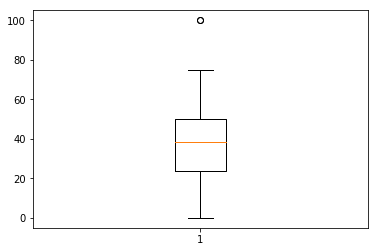

In [39]:
plt.boxplot(null_percent['Percent of Non-Reporting'])

In [44]:
null_percent.loc[null_percent['Percent of Non-Reporting'] == 0]

,Non-Reporting Facilities,Total Facilities,Percent of Non-Reporting
County,,,
ASHLAND,0.0,2,0.0
BUFFALO,0.0,1,0.0
CRAWFORD,0.0,1,0.0
DOOR,0.0,1,0.0
IOWA,0.0,1,0.0
JACKSON,0.0,3,0.0
MARQUETTE,0.0,1,0.0
SAWYER,0.0,3,0.0
VERNON,0.0,2,0.0


In [42]:
null_percent.loc[null_percent['Percent of Non-Reporting'] == 100]

,Non-Reporting Facilities,Total Facilities,Percent of Non-Reporting
County,,,
CLARK,6.0,6,100.0
WASHBURN,1.0,1,100.0


In [45]:
null_percent.sum()

Non-Reporting Facilities     342.000000
Total Facilities             931.000000
Percent of Non-Reporting    2421.867155
dtype: float64